In [1]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("ch:s=.25,rot=-.25", 6)
from astropy.io import ascii

## Analysing Dark Matter Corrs

In [231]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

wgplussesDM_z = []
wgcrossesDM_z = []
ggsDM_z = []
for i in range(0,796):
    for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplussesDM_z.append(wgp)
    wgcrossesDM_z.append(wgx)
    ggsDM_z.append(wgg)
    
wgplussesDM_z = np.array(wgplussesDM_z)
wgcrossesDM_z = np.array(wgcrossesDM_z)
ggsDM_z = np.array(ggsDM_z)

corr_labels = label_table[:796]
print(corr_labels.shape)

(796, 6)


In [232]:
# Get the sorted indices based on the first column of corr_labels
param = 1
sorted_indices = np.argsort(corr_labels[:, param])
print(sorted_indices.shape)

# Sort corr_data and corr_labels using the sorted indices
sorted_wgplus = wgplussesDM_z[sorted_indices]
sorted_wgcross = wgcrossesDM_z[sorted_indices] #corr_data[sorted_indices]
sorted_wgg = ggsDM_z[sorted_indices]
# sorted_corr_labels = corr_labels[sorted_indices]

(796,)


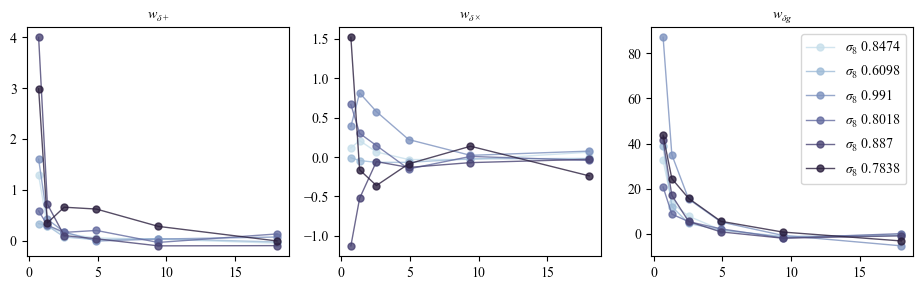

In [233]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
r = r
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(28/3,3))
for i in np.linspace(12,578,6,dtype='int'):
    ax[0].errorbar(r, sorted_wgplus[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[0].set_title(r'$w_{\delta +}$')
    ax[1].errorbar(r, sorted_wgcross[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[1].set_title(r'$w_{\delta \times}$')
    ax[2].errorbar(r, sorted_wgg[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[2].set_title(r'$w_{\delta g}$')
plt.legend()
plt.tight_layout()

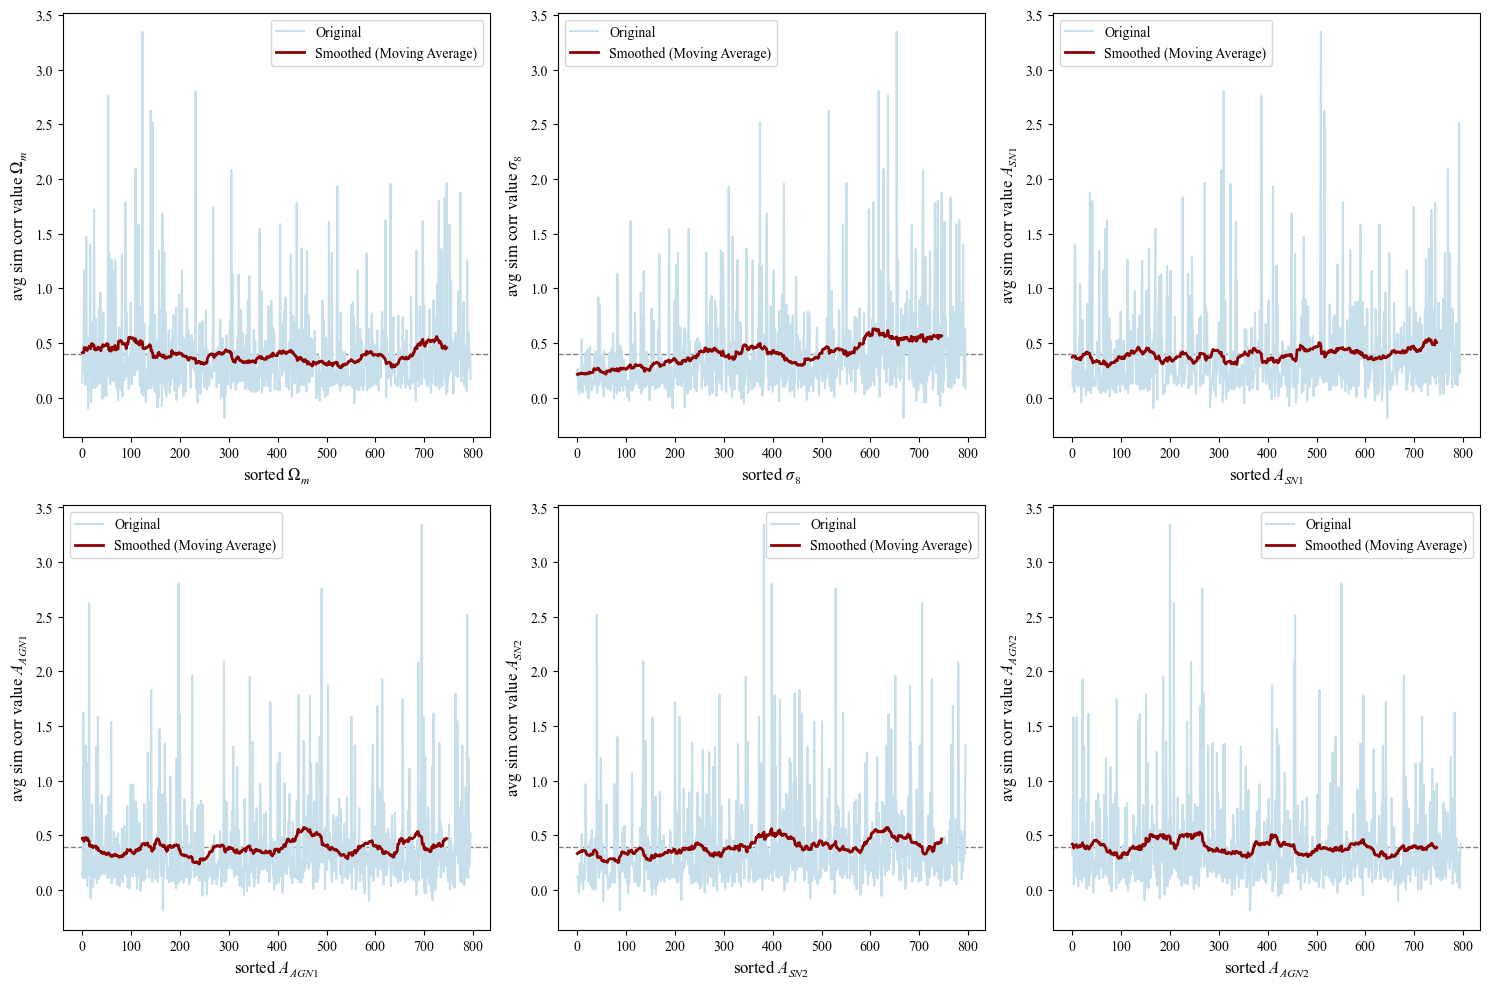

In [234]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easy indexing

for param in range(6):
    ax = axes[param]

    sorted_indices = np.argsort(corr_labels[:, param])

    # Sort corr_data and corr_labels using the sorted indices
    sorted_wgplus = wgplussesDM_z[sorted_indices]
    sorted_wgcross = wgcrossesDM_z[sorted_indices] #corr_data[sorted_indices]
    sorted_wgg = ggsDM_z[sorted_indices]
#     sorted_wgg=sorted_wgplus/sorted_wgg

    smoothed = np.convolve(
    np.mean(sorted_wgplus, axis=1),  # Mean across axis 1
    np.ones(50) / 50,                # Moving average with a window of 10
    mode='valid'                     # Ensures the result has valid values only
    )
    ax.axhline(np.mean(sorted_wgplus), c='0.5', linewidth=1, linestyle='--')
    ax.plot(np.mean(sorted_wgplus, axis=1), label="Original")
    ax.plot(smoothed, label="Smoothed (Moving Average)", linewidth=2,color='darkred')
    ax.legend()
    
    # Set labels, title, and limits
    ax.set_ylabel(f'avg sim corr value ${simpars[param]}$')
    ax.set_xlabel(f'sorted ${simpars[param]}$')
    ax.legend()

plt.tight_layout()
plt.show()

## Analysing Proxy Corrs

In [141]:
# labels
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
corr_labels = np.repeat(label_table, 3, axis=0)
# plus
d = np.load("../wgplus_data.npz")
axes = ['x', 'y', 'z']
r = d['r']
corr_data = {axis: d[axis] for axis in axes}
wgplusses = np.array(corr_data['x'])
wgplusses = np.append(wgplusses, np.append(corr_data['y'],corr_data['z'],axis=0),axis=0)
# cross
d = np.load("../wgcross_data.npz")
corr_data = {axis: d[axis] for axis in axes}
wgcrosses = np.array(corr_data['x'])
wgcrosses = np.append(wgcrosses, np.append(corr_data['y'],corr_data['z'],axis=0),axis=0)
# auto
d = np.load("../wgg_data.npz")
wgg = d['wgg']


print(wgplusses.shape, wgcrosses.shape, wgg.shape, corr_labels.shape)

(3000, 6) (3000, 6) (3000, 6) (3000, 6)


In [142]:
# Get the sorted indices based on the first column of corr_labels
param = 0
sorted_indices = np.argsort(corr_labels[:, param])

# Sort corr_data and corr_labels using the sorted indices
sorted_wgplus = wgplusses[sorted_indices]
sorted_wgcross = wgcrosses[sorted_indices] #corr_data[sorted_indices]
sorted_wgg = wgg[sorted_indices]

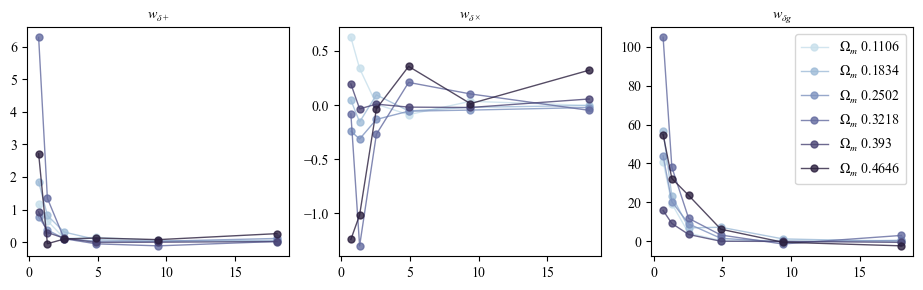

In [143]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(28/3,3))
for i in np.linspace(18,530,6,dtype='int'):
    ax[0].errorbar(r, sorted_wgplus[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[0].set_title(r'$w_{\delta +}$')
    ax[1].errorbar(r, sorted_wgcross[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[1].set_title(r'$w_{\delta \times}$')
    ax[2].errorbar(r, sorted_wgg[i], label = f'${simpars[param]}$ {sorted_corr_labels[i,param]}', linewidth=1, marker='o',markersize=5,alpha=0.8)
    ax[2].set_title(r'$w_{\delta g}$')
plt.legend()
plt.tight_layout()

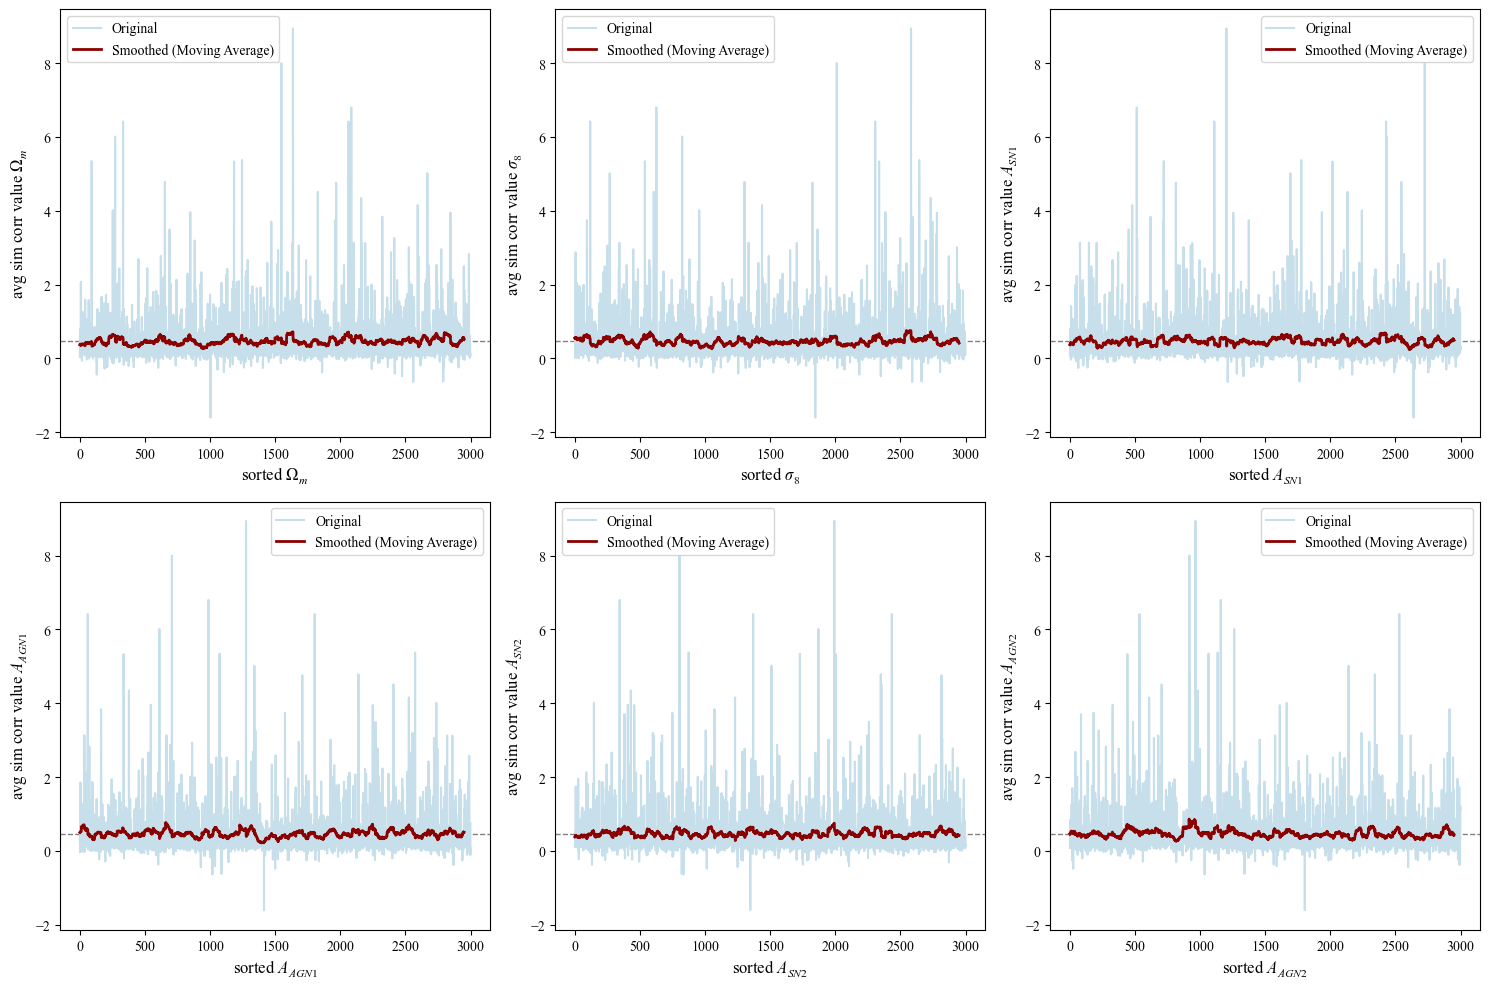

In [148]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the array for easy indexing

for param in range(6):
    ax = axes[param]

    sorted_indices = np.argsort(corr_labels[:, param])

    # Sort corr_data and corr_labels using the sorted indices
    sorted_wgplus = wgplusses[sorted_indices]
    sorted_wgcross = wgcrosses[sorted_indices] #corr_data[sorted_indices]
    sorted_wgg = wgg[sorted_indices]

    smoothed = np.convolve(
    np.mean(sorted_wgplus, axis=1),  # Mean across axis 1
    np.ones(50) / 50,                # Moving average with a window of 10
    mode='valid'                     # Ensures the result has valid values only
    )
    ax.axhline(np.mean(sorted_wgplus), c='0.5', linewidth=1, linestyle='--')
    ax.plot(np.mean(sorted_wgplus, axis=1), label="Original")
    ax.plot(smoothed, label="Smoothed (Moving Average)", linewidth=2,color='darkred')
    ax.legend()
    
    # Set labels, title, and limits
    ax.set_ylabel(f'avg sim corr value ${simpars[param]}$')
    ax.set_xlabel(f'sorted ${simpars[param]}$')
    ax.legend()

plt.tight_layout()
plt.show()

# Pearson Values

In [8]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

d = np.load("../wdplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdplusses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdcrosses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])


print(label_table.shape)
corr_labels = np.vstack((label_table,label_table, label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])
corr_data = wdplusses
print(corr_data.shape, corr_labels.shape, wdd.shape)

(1000, 6)
(3000, 7) (3000, 6) (3000, 7)


In [11]:
# #Just Z axis
# label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

# wgplussesDM_z = []
# wgcrossesDM_z = []
# ggsDM_z = []
# for i in range(0,1000):
#     for j, f in enumerate((f'../correlatingDM-folder/OUTPUT_CAMELS2_DM_LH_y/wgp_LH{i}.dat',f'../correlatingDM-folder/OUTPUT_CAMELS2_DM_LH_y/wgg_LH{i}.dat')):
#         dat = ascii.read(f)
#         if j == 0:
# #             print(dat.colnames)
# #             print(dat['meanr'])
#             r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
#         elif j == 1:
#             r, wgg = dat['rnom'], dat['wgg']
    
#     wgplussesDM_z.append(wgp)
#     wgcrossesDM_z.append(wgx)
#     ggsDM_z.append(wgg)
# wgplussesDM_z = np.array(wgplussesDM_z)
# wgcrossesDM_z = np.array(wgcrossesDM_z)
# ggsDM_z = np.array(ggsDM_z)


# corr_data = wgplussesDM_z; corr_labels = label_table[:]
# print(corr_labels.shape)

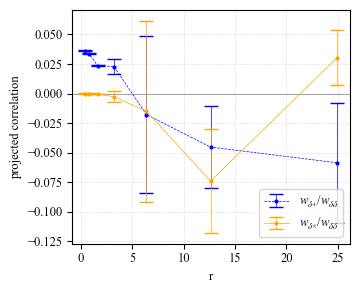

In [9]:
d_wgplusses = wdplusses[:]/wdd
d_wgcrosses = wdcrosses[:]/wdd
sqrtN = np.sqrt(3000)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(11/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r,np.mean(d_wgplusses,axis=0), yerr=np.std(d_wgplusses,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}/w_{\delta\delta}$', marker='o',markersize=2, color='blue')
ax.errorbar(r,np.mean(d_wgcrosses,axis=0), yerr=np.std(d_wgcrosses,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}/w_{\delta\delta}$', marker='o',markersize=2, color='orange')
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#ax.set_ylim(-np.abs(ax.get_ylim()).max(), 0.4*np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"projected correlation")
ax.legend() 
fig.tight_layout()

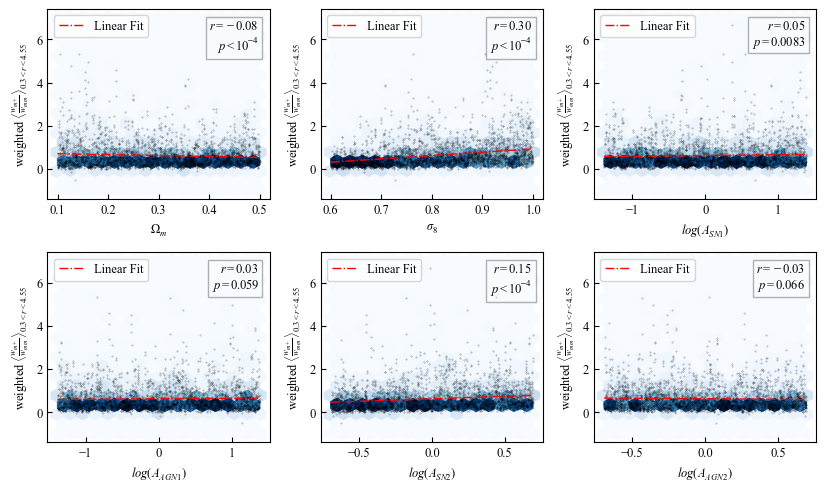

In [10]:
from scipy.stats import pearsonr
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
# fig.suptitle('Pearson Values First 4 Weighted Bins')
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 7),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
#     ax.set_ylim([-0.05, 0.2])
plt.tight_layout()
plt.show()

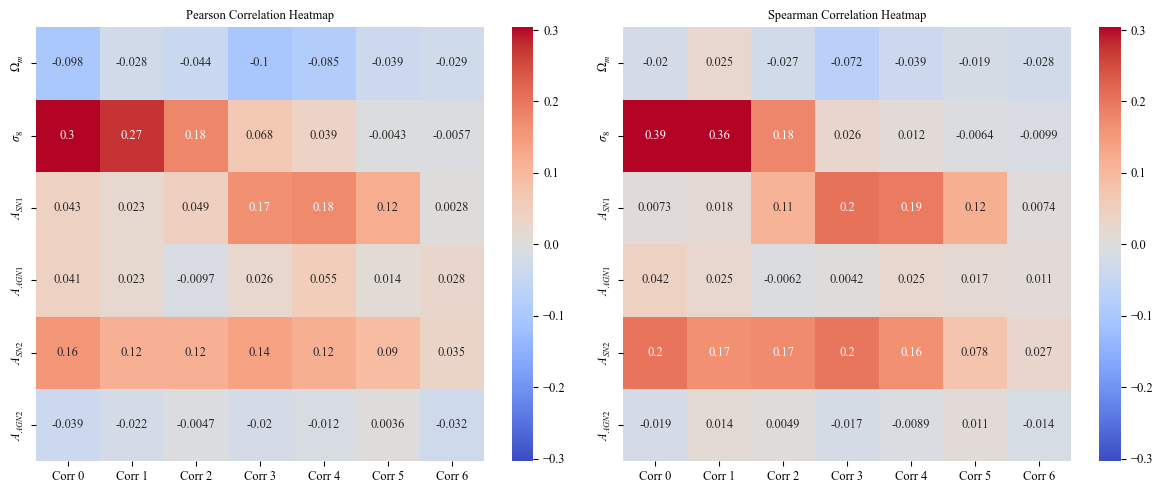

In [11]:
from scipy.stats import pearsonr, spearmanr
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']

# Compute correlation matrices
pearson_matrix = np.zeros((corr_labels.shape[1], corr_data.shape[1]))
spearman_matrix = np.zeros((corr_labels.shape[1], corr_data.shape[1]))

for j in range(corr_labels.shape[1]):  # Loop over label dimensions
    for k in range(corr_data.shape[1]):  # Loop over correlation dimensions
        pearson_matrix[j, k], _ = pearsonr(corr_labels[:, j], corr_data[:, k])
        spearman_matrix[j, k], _ = spearmanr(corr_labels[:, j], corr_data[:, k])

# Create heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix)),
            xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Pearson Correlation Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix))
            , xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

## Dividing by $w_{\delta \delta}$

In [12]:
corr_data = wdplusses / wdd

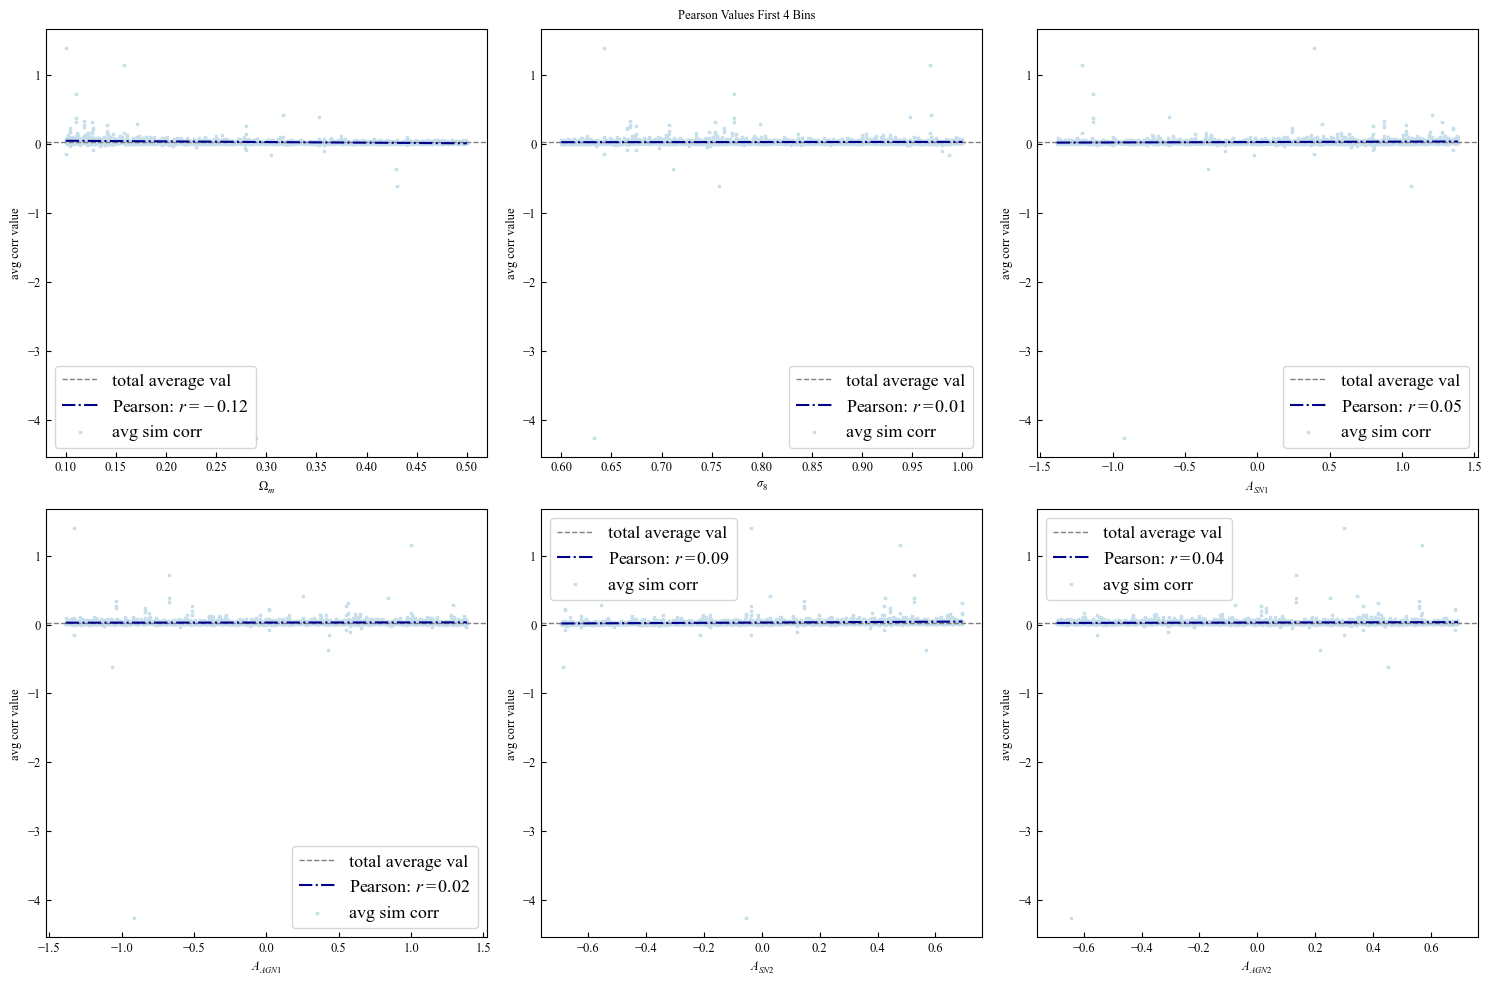

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('Pearson Values First 4 Bins')
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(corr_data[:,:4], axis=1)
    pearson_coeff, _ = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
    ax.axhline(np.mean(corr_data[:,:4]), c='0.5', linewidth=1, linestyle='--',label='total average val')
    ax.plot(x_vals, y_vals, color='darkblue', linestyle='-.', label=f"Pearson: $r={pearson_coeff:.2f}$")
    
    ax.scatter(corr_labels[:, param], avg_corr, s=4, marker='s',label="avg sim corr")
    
#     if param>1: ax.set_xscale('log')
    ax.set_xlabel(f"${simpars[param]}$")
    ax.set_ylabel("avg corr value")
    ax.legend(fontsize="x-large")
    ax.tick_params(direction='in')
#     ax.set_ylim([-0.05, 0.2])

plt.tight_layout()
plt.show()
# plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/divide by w_mm Pearsonfirst4.png', dpi=300)

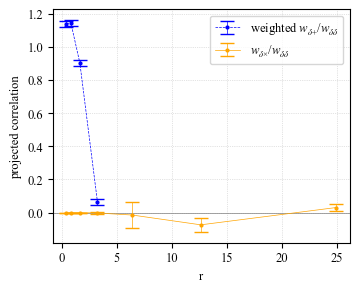

In [15]:
weights = 1/np.std(corr_data[:,:4],axis=0)
wtd_corr_data = corr_data[:,:4]*weights

sqrtN = np.sqrt(3000)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(11/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r[:4],np.mean(wtd_corr_data,axis=0), yerr=np.std(wtd_corr_data,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'weighted $w_{\delta{+}}/w_{\delta\delta}$', marker='o',markersize=2, color='blue')
ax.errorbar(r,np.mean(wdcrosses[:]/wdd,axis=0), yerr=np.std(wdcrosses[:]/wdd,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}/w_{\delta\delta}$', marker='o',markersize=2, color='orange')
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#ax.set_ylim(-np.abs(ax.get_ylim()).max(), 0.4*np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"projected correlation")
ax.legend()
fig.tight_layout()

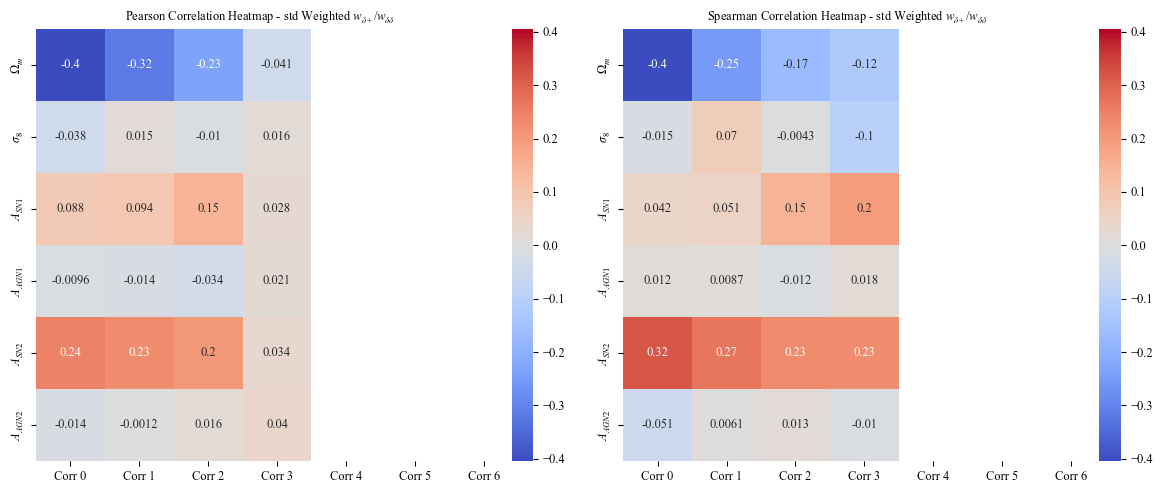

In [16]:
# Compute correlation matrices
pearson_matrix = np.zeros((corr_labels.shape[1], wtd_corr_data.shape[1]))
spearman_matrix = np.zeros((corr_labels.shape[1], wtd_corr_data.shape[1]))

for j in range(corr_labels.shape[1]):  # Loop over label dimensions
    for k in range(wtd_corr_data.shape[1]):  # Loop over correlation dimensions
        pearson_matrix[j, k], _ = pearsonr(corr_labels[:, j], wtd_corr_data[:, k])
        spearman_matrix[j, k], _ = spearmanr(corr_labels[:, j], wtd_corr_data[:, k])

# Create heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix)),
            xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Pearson Correlation Heatmap - std Weighted $w_{\delta +}/w_{\delta \delta}$")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix))
            , xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Spearman Correlation Heatmap - std Weighted $w_{\delta +}/w_{\delta \delta}$")

plt.tight_layout()
plt.show()

In [123]:
min(avg_corr)

-2.794455541341467

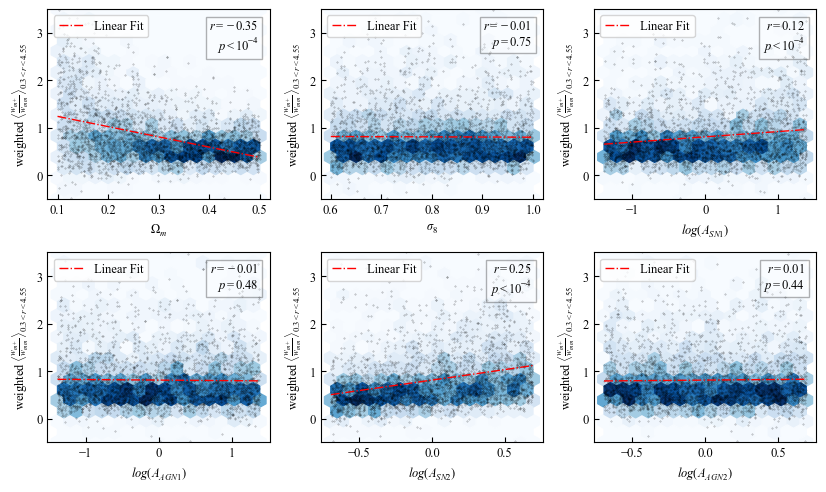

In [17]:
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
# fig.suptitle('Pearson Values First 4 Weighted Bins')
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -0.5, 3.5),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_ylim([-0.5,3.5])
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')

plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/divide by w_mm Pearsonfirst4.pdf', dpi=300)
plt.show()

In [16]:
corr_data.shape

(3000, 7)

In [17]:
#### lineplot
# simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
# axes = axes.flatten()  # Flatten the array for easy indexing

# for param in range(6):
#     ax = axes[param]

#     sorted_indices = np.argsort(corr_labels[:, param])

#     # Sort corr_data and corr_labels using the sorted indices
#     sorted_wgplus = np.mean(corr_data[sorted_indices,:4],axis=1)


#     smoothed = np.convolve(
#     sorted_wgplus,  # Mean across axis 1
#     np.ones(50) / 50,                # Moving average with a window of 10
#     mode='valid'                     # Ensures the result has valid values only
#     )
#     ax.axhline(np.mean(corr_data), c='0.5', linewidth=1, linestyle='--')
#     ax.plot(sorted_wgplus, label="Original")
#     ax.plot(smoothed, label="Smoothed (Moving Average)", linewidth=2,color='darkred')
#     ax.legend()
    
#     # Set labels, title, and limits
#     ax.set_ylabel(f'avg sim corr value ${simpars[param]}$')
#     ax.set_xlabel(f'sorted ${simpars[param]}$')
#     ax.legend()

# plt.tight_layout()
# plt.show()

# PCA
First PCA on undivided $w_{\delta +} $

In [18]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

d = np.load("../wdplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdplusses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdcrosses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])


print(label_table.shape)
corr_labels = np.vstack((label_table,label_table,label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])
corr_data = wdplusses
print(corr_data.shape, corr_labels.shape)

(1000, 6)
(3000, 7) (3000, 6)


In [19]:
from sklearn.decomposition import PCA

# Apply PCA to corr_data
pca = PCA(n_components=7)
corr_data_pca = pca.fit_transform(corr_data)  # Transformed data in PCA space

# Print explained variance ratio for each component
print("Pre PCA Variance ratio",np.var(corr_data, axis=0)/np.sum(np.var(corr_data, axis=0)))
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Pre PCA Variance ratio [7.85774537e-01 1.91722157e-01 1.89227108e-02 1.90890507e-03
 3.96443750e-04 1.64219697e-04 1.11102658e-03]
Explained Variance Ratio: [9.36089126e-01 5.35271490e-02 7.69126339e-03 1.22608246e-03
 1.10130903e-03 2.70185867e-04 9.48844894e-05]


In [20]:
from scipy.stats import pearsonr, spearmanr

# Correlate each PCA component with each label
for i in range(corr_data_pca.shape[1]):  # Loop over PCA components
    for j in range(corr_labels.shape[1]):  # Loop over labels
        corr, _ = pearsonr(corr_data_pca[:, i], corr_labels[:, j])
        sper_corr, _ = spearmanr(corr_data_pca[:, i], corr_labels[:, j])
        print(f"PCA Component {i+1}, Label {j+1}: Pearson Correlation = {corr:.2f}, Pearson Correlation = {sper_corr:.2f}")

PCA Component 1, Label 1: Pearson Correlation = -0.09, Pearson Correlation = -0.02
PCA Component 1, Label 2: Pearson Correlation = 0.31, Pearson Correlation = 0.40
PCA Component 1, Label 3: Pearson Correlation = 0.04, Pearson Correlation = 0.01
PCA Component 1, Label 4: Pearson Correlation = 0.04, Pearson Correlation = 0.04
PCA Component 1, Label 5: Pearson Correlation = 0.15, Pearson Correlation = 0.20
PCA Component 1, Label 6: Pearson Correlation = -0.04, Pearson Correlation = -0.01
PCA Component 2, Label 1: Pearson Correlation = -0.10, Pearson Correlation = -0.09
PCA Component 2, Label 2: Pearson Correlation = 0.00, Pearson Correlation = 0.05
PCA Component 2, Label 3: Pearson Correlation = 0.02, Pearson Correlation = -0.01
PCA Component 2, Label 4: Pearson Correlation = 0.03, Pearson Correlation = 0.03
PCA Component 2, Label 5: Pearson Correlation = 0.03, Pearson Correlation = 0.06
PCA Component 2, Label 6: Pearson Correlation = -0.02, Pearson Correlation = -0.03
PCA Component 3, La

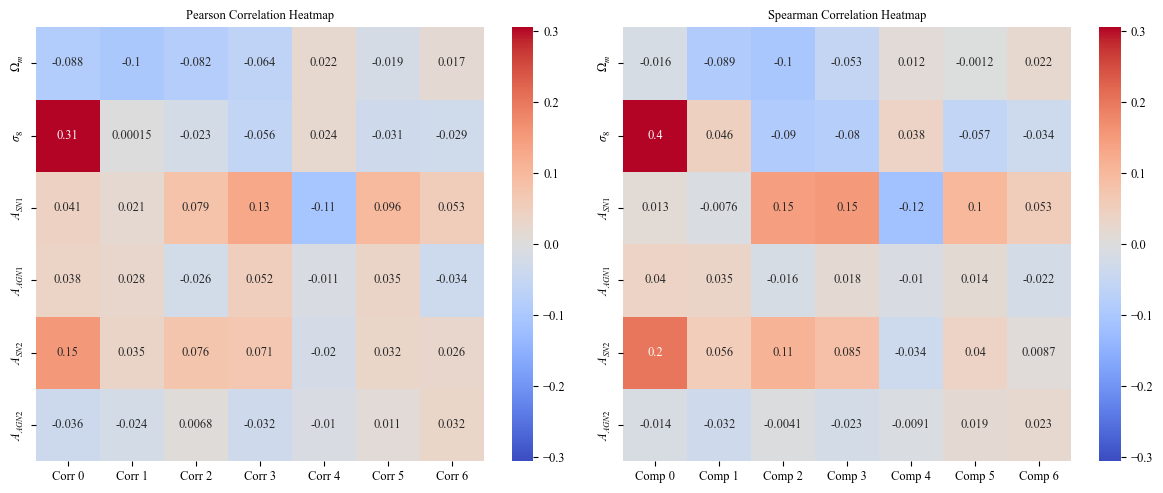

In [21]:
from scipy.stats import pearsonr, spearmanr
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
# Compute correlation matrices
pearson_matrix = np.zeros((corr_labels.shape[1], corr_data_pca.shape[1]))
spearman_matrix = np.zeros((corr_labels.shape[1], corr_data_pca.shape[1]))

for j in range(corr_labels.shape[1]):  # Loop over label dimensions
    for k in range(corr_data.shape[1]):  # Loop over correlation dimensions
        pearson_matrix[j, k], _ = pearsonr(corr_labels[:, j], corr_data_pca[:, k])
        spearman_matrix[j, k], _ = spearmanr(corr_labels[:, j], corr_data_pca[:, k])

# Create heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix)),
            xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Pearson Correlation Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix))
            , xticklabels=[f"Comp {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()

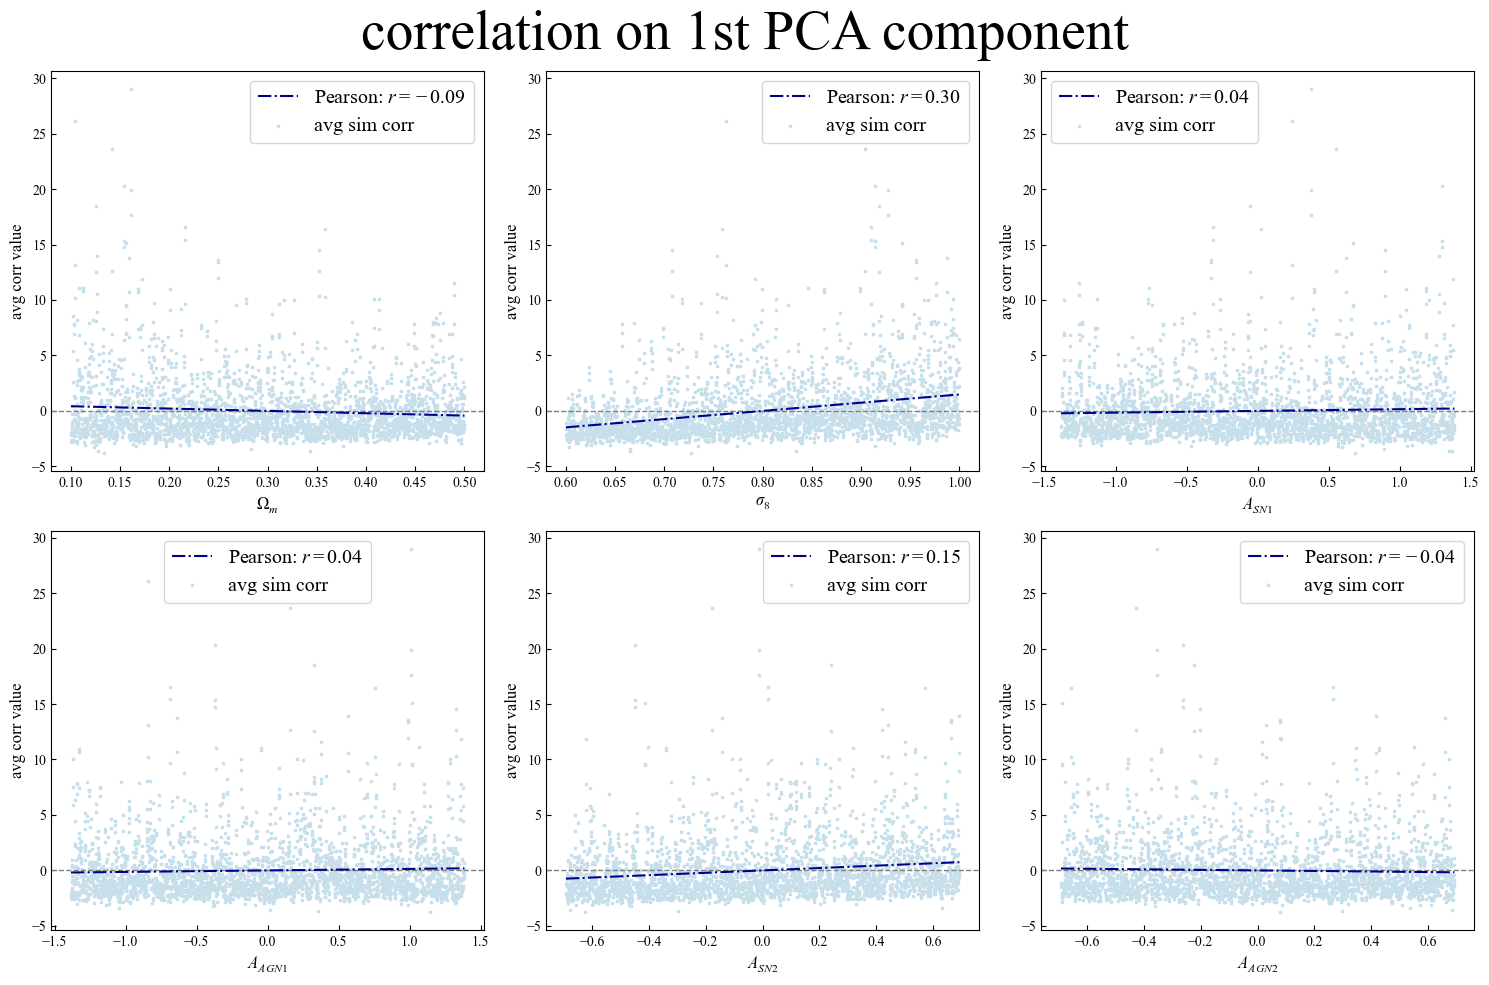

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('correlation on 1st PCA component')
for param in range(6):
    ax = axes[param]
#     avg_corr = np.mean(corr_data_pca, axis=1)
    avg_corr = corr_data_pca[:,0]
    pearson_coeff, _ = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept
    # Plot the trend line
    ax.axhline(np.mean(corr_data_pca), c='0.5', linewidth=1, linestyle='--')
    ax.plot(x_vals, y_vals, color='darkblue', linestyle='-.', label=f"Pearson: $r={pearson_coeff:.2f}$")
    
    ax.scatter(corr_labels[:, param], avg_corr, s=4, marker='s',label="avg sim corr")
    
#     if param>1: ax.set_xscale('log')
    ax.set_xlabel(f"${simpars[param]}$")
    ax.set_ylabel("avg corr value")
    ax.legend(fontsize="x-large")
    ax.tick_params(direction='in')

plt.tight_layout()
plt.show()

# PCA  $\,w_{\delta+}/w_{\delta \delta}$

In [22]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

d = np.load("../wdplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdplusses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdcrosses = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])

corr_labels = np.vstack((label_table,label_table,label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])
corr_data = wdplusses
print(corr_data.shape, corr_labels.shape)

(3000, 7) (3000, 6)


In [23]:
corr_data = wdplusses/wdd

In [24]:
from sklearn.decomposition import PCA
# Apply PCA to corr_data
pca = PCA(n_components=4)
corr_data_pca = pca.fit_transform(corr_data[:,:4])  # Transformed data in PCA space

# Print explained variance ratio for each component
print("Pre PCA Variance ratio",np.var(corr_data, axis=0)/np.sum(np.var(corr_data, axis=0)))
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Pre PCA Variance ratio [4.11861928e-05 3.51290869e-05 2.74886790e-05 5.06721792e-03
 5.34235041e-01 1.46220649e-01 3.14373289e-01]
Explained Variance Ratio: [0.98000479 0.01557202 0.00310077 0.00132242]


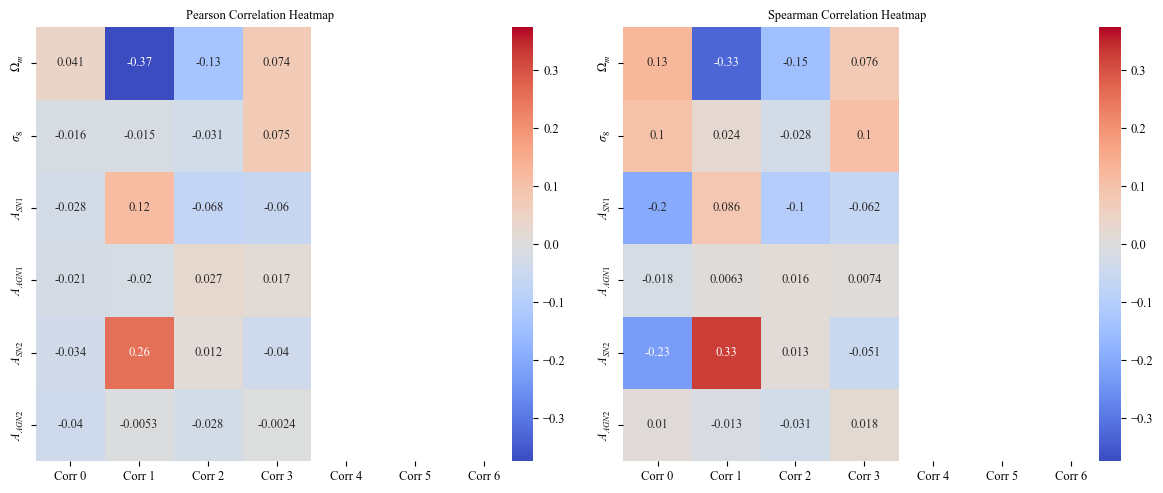

In [25]:
from scipy.stats import pearsonr, spearmanr
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{AGN1}','A_{SN2}','A_{AGN2}']

# Compute correlation matrices
pearson_matrix = np.zeros((corr_labels.shape[1], corr_data_pca.shape[1]))
spearman_matrix = np.zeros((corr_labels.shape[1], corr_data_pca.shape[1]))

for j in range(corr_labels.shape[1]):  # Loop over label dimensions
    for k in range(corr_data_pca.shape[1]):  # Loop over correlation dimensions
        pearson_matrix[j, k], _ = pearsonr(corr_labels[:, j], corr_data_pca[:, k])
        spearman_matrix[j, k], _ = spearmanr(corr_labels[:, j], corr_data_pca[:, k])

# Create heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix)),
            xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Pearson Correlation Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-np.max(abs(pearson_matrix)), vmax=np.max(abs(pearson_matrix))
            , xticklabels=[f"Corr {i}" for i in range(corr_data.shape[1])], 
            yticklabels=[f"${simpars[i]}$" for i in range(corr_labels.shape[1])])
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()

0.04099121112397706
-0.016416293895557443
-0.027979897993591366
-0.020528963591987325
-0.033922343762155555
-0.03981074919266157


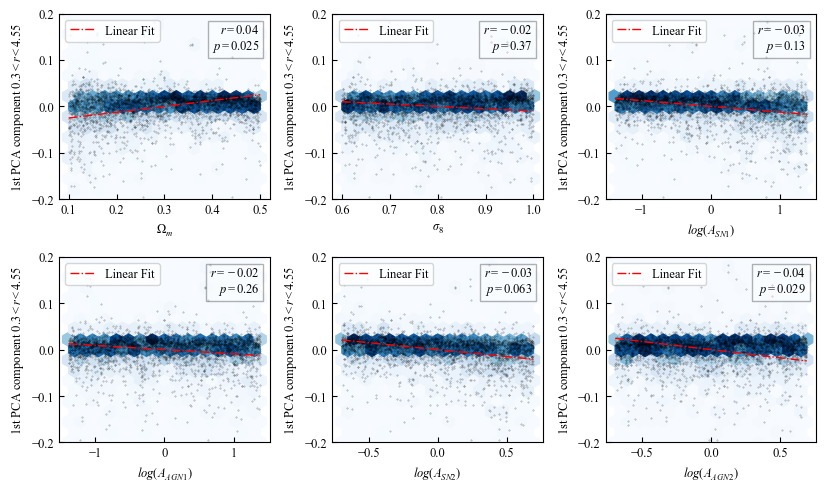

In [26]:
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5)) 
axes = axes.flatten()  
# fig.suptitle('correlation on 1st PCA component $\,w_{\delta+}/w_{\delta \delta}$')
for param in range(6):
    ax = axes[param]
#     avg_corr = np.mean(corr_data_pca, axis=1)
    avg_corr = corr_data_pca[:,0]
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    print(pearson_coeff)

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept
    # Plot the trend line
#     ax.axhline(0, c='k', linewidth=0.2, linestyle='-')#, label='y=0')
    ax.plot(x_vals, y_vals, color='red', linewidth=1,linestyle='-.', label=f"Linear Fit")

    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -0.2, 0.2),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")

    ax.set_ylim([-0.2,0.2])
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r'1st PCA component ${0.3<r<4.55}$',fontsize=9)
    ax.legend(fontsize=9, loc='upper left')
    ax.tick_params(direction='in')

plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/divide by w_mm PCA.pdf', dpi=300)
plt.show()

-0.3740604460365524
-0.015316053213336322
0.1153585067446461
-0.020436072986862293
0.2561679313767716
-0.005327376344559091


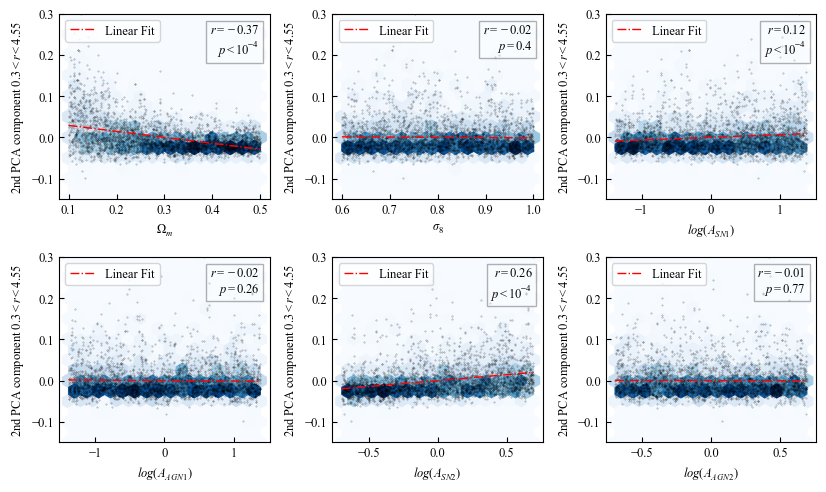

In [27]:
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5)) 
axes = axes.flatten()  
# fig.suptitle('correlation on 1st PCA component $\,w_{\delta+}/w_{\delta \delta}$')
for param in range(6):
    ax = axes[param]
#     avg_corr = np.mean(corr_data_pca, axis=1)
    avg_corr = corr_data_pca[:,1]
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
    print(pearson_coeff)

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept
    # Plot the trend line
#     ax.axhline(0, c='k', linewidth=0.2, linestyle='-')#, label='y=0')
    ax.plot(x_vals, y_vals, color='red', linewidth=1,linestyle='-.', label=f"Linear Fit")

    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -0.15, 0.3),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_ylim([-0.15,0.3])
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r'2nd PCA component ${0.3<r<4.55}$',fontsize=9)
    ax.legend(fontsize=9, loc='upper left')
    ax.tick_params(direction='in')

plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/divide by w_mm PCA.pdf', dpi=300)
plt.show()

How is p-value calculated ?

In [29]:
import numpy as np
from scipy.stats import t

# Example data
n = 1000  # Number of samples
r = 0.2801257637707583  # Pearson correlation coefficient

# 1. Compute the t-statistic
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# 2. Compute the p-value from the t-distribution
df = n - 2  # Degrees of freedom
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))  # Two-tailed p-value

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value}")


t-statistic: 9.22
p-value: 0.0


In [23]:
1-0.2801257637707583**2

0.9215295564718493